# Preprocessing of the dataset

## 1: Importing the libraries

In [1296]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

## 2: Importing the dataset

In [1297]:
df = pd.read_csv(r'../data/original_data.csv')
test = pd.read_csv(r'../data/test_set.csv', sep=';')

print(df.head())



   ADR_SECTEUR  ANNEEDEPLANTATION ANNEEREALISATIONDIAGNOSTIC  \
0            5               2014                       2014   
1            3               2004                       2013   
2            3               2004                          ?   
3            2               2004                       2014   
4            1               2004                       2013   

  ANNEETRAVAUXPRECONISESDIAG      CODE CODE_PARENT  \
0                       2019  ESP33155      ESP385   
1                          ?   ESP2079      ESP116   
2                       2014  ESP26205      ESP635   
3                       2014   ESP7496      ESP109   
4                          ?   ESP2547      ESP194   

                 CODE_PARENT_DESC DIAMETREARBREAUNMETRE       ESPECE  \
0     R D Fontanelle ang Essen JO            10 à 20 cm      cordata   
1  Crs Libération Beauvert Alliés            30 à 40 cm   acerifolia   
2   Pl R Frappat ang Eaux Claires            10 à 20 cm  grandiflora   
3 

## 3: Deleting the columns that are not required

In [1298]:
df = df.drop(columns=['ADR_SECTEUR', 'CODE', 'CODE_PARENT_DESC', 'IDENTIFIANTPLU', 'IDENTIFIANTPLU', 'STADEDEDEVELOPPEMENT','SOUS_CATEGORIE','Racine','Tronc', 'Collet', 'Houppier',])
test = test.drop(columns=['ADR_SECTEUR', 'CODE', 'CODE_PARENT_DESC', 'IDENTIFIANTPLU', 'IDENTIFIANTPLU', 'STADEDEDEVELOPPEMENT','SOUS_CATEGORIE',])


### Schema of the dataset
| VARIABLE                              | TYPE       | EXEMPLE                                   | TRANSFORMATION        |
|---------------------------------------|------------|-------------------------------------------|-----------------------|
| ANNEEDEPLANTATION                     | numérique  | 2014                                      | /                     |
| ANNEEREALISATIONDIAGNOSTIC           | numérique  | 2014                                      | /                     |
| ANNEETRAVAUXPRECONISESDIAG           | numérique  | 2019                                      | /                     |
| CODE_PARENT                           | nominale   | ESP385                                    | Label Encoding        |
| DIAMETREARBREAUNMETRE                 | ordinale   | 10 à 20 cm                               | Ordinal Encoding      |
| ESPECE                                | nominale   | cordata                                   | Label Encoding        |
| FREQUENTATIONCIBLE                    | ordinale   | passages fréquents ou arrêts             | Ordinal Encoding      |
| GENRE_BOTA                            | nominale   | Alnus                                     | Label Encoding        |
| INTITULEPROTECTIONPLU                 | nominale   | L 1231.7                                  | One-Hot Encoding      |
| NOTEDIAGNOSTIC                        | ordinale   | Arbre d'avenir incertain                  | Ordinal Encoding      |
| PRIORITEDERENOUVELLEMENT              | ordinale   | de 11 à 20 ans                           | Ordinal Encoding      |
| RAISONDEPLANTATION                    | nominale   | Nouveau                                   | Label Encoding        |
| REMARQUES                             | textuelle  | var. Wieri                                | /                     |
| SOUS_CATEGORIE_DESC                   | nominale   | Arbre d'enceintes fermées                 | One-Hot Encoding      |
| STADEDEVELOPPEMENTDIAG                | ordinale   | Arbre adulte                              | Ordinal Encoding      |
| TRAITEMENTCHENILLES                   | ordinale   | Moyenne                                   | Ordinal Encoding      |
| TRAVAUXPRECONISESDIAG                 | nominale   | Taille formation et mise au gabarit      | Label Encoding        |
| TROTTOIR                              | binaire    | non                                       | One-Hot Encoding      |
| TYPEIMPLANTATIONPLU                   | nominale   | Alignement                                | Label Encoding        |
| VARIETE                               | nominale   | Pendula                                   | One-Hot Encoding      |
| VIGUEUR                               | ordinale   | vigueur intermédiaire                     | Ordinal Encoding      |


## 4: Checking for missing values

In [1299]:
df.replace('?', np.nan, inplace=True)
missing_values = df.isna().sum()
test.replace('?', np.nan, inplace=True)
test_missing_values = test.isna().sum()
print(missing_values)
print(test_missing_values)

ANNEEDEPLANTATION                 0
ANNEEREALISATIONDIAGNOSTIC        8
ANNEETRAVAUXPRECONISESDIAG     4511
CODE_PARENT                       0
DIAMETREARBREAUNMETRE            67
ESPECE                         1018
FREQUENTATIONCIBLE                1
GENRE_BOTA                        0
INTITULEPROTECTIONPLU         15014
NOTEDIAGNOSTIC                   40
PRIORITEDERENOUVELLEMENT        127
RAISONDEPLANTATION            15145
REMARQUES                     11176
SOUS_CATEGORIE_DESC               0
STADEDEVELOPPEMENTDIAG           13
TRAITEMENTCHENILLES           14287
TRAVAUXPRECONISESDIAG          4525
TROTTOIR                          0
TYPEIMPLANTATIONPLU           15014
VARIETE                       13212
VIGUEUR                          11
coord_x                           0
coord_y                           0
DEFAUT                            0
dtype: int64
ANNEEDEPLANTATION                0
ANNEEREALISATIONDIAGNOSTIC       2
ANNEETRAVAUXPRECONISESDIAG    1503
CODE_PARENT       

## 5: Dealing with missing values

In [1300]:
# Fonction pour corriger les valeurs manquantes
def impute_missing_values(df):
    for column in df.columns:
        # Vérifie si la colonne est censée être numérique
        if column in ['ANNEEDEPLANTATION', 'ANNEEREALISATIONDIAGNOSTIC', 'ANNEETRAVAUXPRECONISESDIAG']:
            # Convertit la colonne en numérique, remplaçant les valeurs non numériques par NaN
            df[column] = pd.to_numeric(df[column], errors='coerce')
            mean_value = round(df[column].mean())
            df[column] = df[column].fillna(mean_value)
        else:
            missing_percentage = df[column].isnull().mean() * 100
            if missing_percentage > 3:
                df[column] = df[column].fillna('valeur manquante')
            else:
                mode_value = df[column].mode()[0]
                df[column] = df[column].fillna(mode_value)


# Appel de la fonction
impute_missing_values(df)
impute_missing_values(test)

##  6 Transformation de variable catégorielle en variable numérique

CODE_PARENT

In [1301]:
from sklearn.preprocessing import LabelEncoder

# Création d'un objet LabelEncoder
le_code_parent = LabelEncoder()

# Application du label encoding sur la colonne CODE_PARENT
df['CODE_PARENT'] = le_code_parent.fit_transform(df['CODE_PARENT'])
test['CODE_PARENT'] = le_code_parent.fit_transform(test['CODE_PARENT'])




DIAMETREARBREAUNMETRE

In [1302]:

# Définition de la correspondance entre les valeurs de la colonne DIAMETREARBREAUNMETRE et les valeurs ordinales
ordinal_mapping_diametre_arbre = {
    '0 à 10 cm': 1,
    '10 à 20 cm': 2,
    '20 à 30 cm': 3,
    '30 à 40 cm': 4,
    '40 à 50 cm': 5,
    '50 à 60 cm': 6,
    '60 à 70 cm': 7,
    '70 à 80 cm': 8,
    '80 à 90 cm': 9,
    '90 à 100 cm': 10,
    '100 à 110 cm': 11,
    '110 à 120 cm': 12,
    '120 à 130 cm': 13,
    '130 à 140 cm': 14,
    '140 à 150 cm': 15,
    '150 à 160 cm': 16,
    '160 à 170 cm': 17,
    '170 à 180 cm': 18,
    '180 à 190 cm': 19
}

# Application de l'ordinal encoding sur la colonne DIAMETREARBREAUNMETRE
df['DIAMETREARBREAUNMETRE'] = df['DIAMETREARBREAUNMETRE'].map(ordinal_mapping_diametre_arbre)
test['DIAMETREARBREAUNMETRE'] = test['DIAMETREARBREAUNMETRE'].map(ordinal_mapping_diametre_arbre )



ESPECE

In [1303]:

# Création d'un objet LabelEncoder
le_espece = LabelEncoder()

# Application du label encoding sur la colonne ESPECE
df['ESPECE'] = le_espece.fit_transform(df['ESPECE'])
test['ESPECE'] = le_espece.fit_transform(test['ESPECE'])



FREQUENTATIONCIBLE

In [1304]:

# Définition de la correspondance entre les valeurs de la colonne FREQUENTATIONCIBLE et les valeurs ordinales
ordinal_mapping_frequentation_cible = {
    'quelques passages': 1,
    'passages fréquents ou arrêts': 2,
    'passages fréquents et arrêts fréquents': 3
}

# Application de l'ordinal encoding sur la colonne FREQUENTATIONCIBLE
df['FREQUENTATIONCIBLE'] = df['FREQUENTATIONCIBLE'].map(ordinal_mapping_frequentation_cible)
test['FREQUENTATIONCIBLE'] = test['FREQUENTATIONCIBLE'].map(ordinal_mapping_frequentation_cible)



GENRE_BOTA

In [1305]:


# Création d'un objet LabelEncoder
le_genre_bota = LabelEncoder()

# Application du label encoding sur la colonne GENRE_BOTA
df['GENRE_BOTA'] = le_genre_bota.fit_transform(df['GENRE_BOTA'])
test['GENRE_BOTA'] = le_genre_bota.fit_transform(test['GENRE_BOTA'])



INTITULEPROTECTIONPLU

In [1306]:

# Application du one-hot encoding sur la colonne INTITULEPROTECTIONPLU
df = pd.get_dummies(df, columns=['INTITULEPROTECTIONPLU'])
test = pd.get_dummies(test, columns=['INTITULEPROTECTIONPLU'])



NOTEDIAGNOSTIC

In [1307]:
# Supprimer les apostrophes dans la colonne NOTEDIAGNOSTIC de test
test['NOTEDIAGNOSTIC'] = test['NOTEDIAGNOSTIC'].str.replace("'", "")

# Définition de la correspondance entre les valeurs de la colonne NOTEDIAGNOSTIC et les valeurs ordinales
ordinal_mapping_note_diagnostic = {
    "Arbre davenir normal": 1,
    "Arbre davenir incertain": 2,
    "Arbre à abattre dans les 10 ans": 3,
    "Arbre à abattre dans les 5 ans": 4,
    "Arbre à abattre immédiatement": 5
}

# Application de l'ordinal encoding sur la colonne NOTEDIAGNOSTIC
df['NOTEDIAGNOSTIC'] = df['NOTEDIAGNOSTIC'].map(ordinal_mapping_note_diagnostic)
test['NOTEDIAGNOSTIC'] = test['NOTEDIAGNOSTIC'].map(ordinal_mapping_note_diagnostic)

# Vérification des valeurs après encodage
print("Valeurs uniques dans df['NOTEDIAGNOSTIC'] :", df['NOTEDIAGNOSTIC'].unique())
print("Valeurs uniques dans test['NOTEDIAGNOSTIC'] :", test['NOTEDIAGNOSTIC'].unique())




Valeurs uniques dans df['NOTEDIAGNOSTIC'] : [1 4 3 2 5]
Valeurs uniques dans test['NOTEDIAGNOSTIC'] : [1 2 4 3 5]


PRIORITEDERENOUVELLEMENT

In [1308]:


# Définition de la correspondance entre les valeurs de la colonne PRIORITEDERENOUVELLEMENT et les valeurs ordinales
ordinal_mapping_priorite_de_renouvellement = {
    'de 1 à 5 ans': 1,
    'de 6 à 10 ans': 2,
    'de 11 à 20 ans': 3,
    'plus de 20 ans': 4
}

# Application de l'ordinal encoding sur la colonne PRIORITEDERENOUVELLEMENT
df['PRIORITEDERENOUVELLEMENT'] = df['PRIORITEDERENOUVELLEMENT'].map(ordinal_mapping_priorite_de_renouvellement)

test['PRIORITEDERENOUVELLEMENT'] = test['PRIORITEDERENOUVELLEMENT'].map(ordinal_mapping_priorite_de_renouvellement)


RAISONDEPLANTATION

In [1309]:


# Application du one-hot encoding sur la colonne RAISONDEPLANTATION
df = pd.get_dummies(df, columns=['RAISONDEPLANTATION'])
test = pd.get_dummies(test, columns=['RAISONDEPLANTATION'])



REMARQUES

In [1310]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from nltk.util import ngrams
from collections import Counter
import joblib

# Chargement des données
comments = df['REMARQUES'].astype(str)
comments_test = test['REMARQUES'].astype(str)

# Fonction pour extraire les bigrammes
def extract_bigrams(text):
    tokens = text.split()
    bigrams = list(ngrams(tokens, 2))
    return [' '.join(bigram) for bigram in bigrams]

# Appliquer la fonction sur tous les commentaires
bigrams = comments.apply(extract_bigrams)

# Aplatir la liste de bigrammes et compter les fréquences
flat_bigrams = [bigram for sublist in bigrams for bigram in sublist]
bigram_counts = Counter(flat_bigrams)

# Convertir les bigrammes en DataFrame pour visualiser les plus fréquents
bigram_df = pd.DataFrame(bigram_counts.items(), columns=['bigram', 'count'])
print("Bigrammes les plus fréquents :")
print(bigram_df.sort_values(by='count', ascending=False).head(10))

# Vectorisation des bigrammes
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Ajuster le vectorizer sur le jeu d'entraînement
X_train = vectorizer.fit_transform(comments)

# Clustering KMeans
k = 200  # Nombre de clusters, ajustez-le selon vos besoins
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train)

# Ajouter les labels de cluster au DataFrame d'entraînement
df['remarquesclusterisées'] = kmeans.labels_

# Enregistrer le modèle KMeans et le vectorizer
joblib.dump(kmeans, '../cluster/kmeans_model_remarques.pkl')
joblib.dump(vectorizer, '../cluster/vectorizer_remarques.pkl')

# Maintenant, on applique le modèle aux remarques du jeu de test

# Charger le modèle KMeans et le vectorizer
kmeans = joblib.load('../cluster/kmeans_model_remarques.pkl')
vectorizer = joblib.load('../cluster/vectorizer_remarques.pkl')

# Vectorisation des remarques de test avec le même vectorizer
X_test = vectorizer.transform(comments_test)

# Prédire les clusters pour les remarques du jeu de test
test['remarquesclusterisées'] = kmeans.predict(X_test)

# Afficher les clusters dans le jeu de test
for i in range(k):
    print(f"\nCluster {i} (test):")
    print(test[test['remarquesclusterisées'] == i]['REMARQUES'].values)

# Optionnel : Supprimer la colonne 'REMARQUES' après clustering
df = df.drop(columns=['REMARQUES'])
test = test.drop(columns=['REMARQUES'])

# Sauvegarder les DataFrames si besoin
df.to_csv(r'../data/df_with_clusters.csv', index=False)
test.to_csv(r'../data/test_with_clusters.csv', index=False)


Bigrammes les plus fréquents :
               bigram  count
0    valeur manquante  11176
38            de chat    363
37           Têtes de    251
107     Erreur espèce    172
83     Erreur essence    136
19             sur le    129
367            chat à    102
368      à entretenir    100
36         var. Wieri    100
176       de branches     98

Cluster 0 (test):
['valeur manquante' 'valeur manquante' 'valeur manquante' ...
 'valeur manquante' 'valeur manquante' 'valeur manquante']

Cluster 1 (test):
["Aire de jeux, Casse de branches d'origine climatique."
 "Aire de jeux, Casse de branches d'origine climatique."]

Cluster 2 (test):
['Protection à mettre en place' 'Protection à mettre en place'
 'Protection à mettre en place' 'Protection à mettre en place'
 'Protection à mettre en place'
 'Protection à mettre en place + Mulch (arbre affaibli)'
 'Protectio à mettre en place !' 'Protection à mettre en place'
 'Protection à mettre en place' 'Protection à mettre en place'
 'Protection à 

SOUS_CATEGORIE_DESC

In [1311]:


# Application du one-hot encoding sur la colonne SOUS_CATEGORIE_DESC
df = pd.get_dummies(df, columns=['SOUS_CATEGORIE_DESC'])
test = pd.get_dummies(test, columns=['SOUS_CATEGORIE_DESC'])



STADEDEVELOPPEMENT DIAG

In [1312]:

# Définition de la correspondance entre les valeurs de la colonne STADEDEVELOPPEMENTDIAG et les valeurs ordinales
ordinal_mapping_stade = {
    'Arbre jeune': 1,
    'Arbre adulte': 2,
    'Arbre vieillissant': 3
}

# Application de l'ordinal encoding sur la colonne STADEDEVELOPPEMENTDIAG
df['STADEDEVELOPPEMENTDIAG'] = df['STADEDEVELOPPEMENTDIAG'].map(ordinal_mapping_stade)
test['STADEDEVELOPPEMENTDIAG'] = test['STADEDEVELOPPEMENTDIAG'].map(ordinal_mapping_stade)


TRAITEMENTCHENILLES

In [1313]:


# Définition de la correspondance entre les valeurs de la colonne TRAITEMENTCHENILLES et les valeurs ordinales
ordinal_mapping_traitement = {
    'valeur manquante': 0,
    'Basse': 1,
    'Moyenne': 2,
    'Haute': 3
}

# Application de l'ordinal encoding sur la colonne TRAITEMENTCHENILLES
df['TRAITEMENTCHENILLES'] = df['TRAITEMENTCHENILLES'].map(ordinal_mapping_traitement)
test['TRAITEMENTCHENILLES'] = test['TRAITEMENTCHENILLES'].map(ordinal_mapping_traitement)

TRAVAUXPRECONISESDIAG

In [1314]:

# Création d'un objet LabelEncoder
le_travaux_preconises_diag = LabelEncoder()

# Application du label encoding sur la colonne TRAVAUXPRECONISESDIAG
df['TRAVAUXPRECONISESDIAG'] = le_travaux_preconises_diag.fit_transform(df['TRAVAUXPRECONISESDIAG'])
test['TRAVAUXPRECONISESDIAG'] = le_travaux_preconises_diag.fit_transform(test['TRAVAUXPRECONISESDIAG'])


TROTTOIR

In [1315]:


# Création d'un objet LabelEncoder
le_trottoir = LabelEncoder()

# Application du label encoding sur la colonne TROTTOIR
df['TROTTOIR'] = le_trottoir.fit_transform(df['TROTTOIR'])
test['TROTTOIR'] = le_trottoir.fit_transform(test['TROTTOIR'])


TYPEIMPLANTATIONPLU

In [1316]:


# Application du one-hot encoding sur la colonne TYPEIMPLANTATIONPLU
df = pd.get_dummies(df, columns=['TYPEIMPLANTATIONPLU'])
test = pd.get_dummies(test, columns=['TYPEIMPLANTATIONPLU'])



VARIETE

In [1317]:


# Création d'un objet LabelEncoder
le_variete = LabelEncoder()

# Application du label encoding sur la colonne VARIETE
df['VARIETE'] = le_variete.fit_transform(df['VARIETE'])
test['VARIETE'] = le_variete.fit_transform(test['VARIETE'])


VIGUEUR

In [1318]:

# Définition de la correspondance entre les valeurs de la colonne VIGUEUR et les valeurs ordinales
ordinal_mapping_vigoureux = {
    'vigoureux': 4,
    'vigueur intermédiaire': 3,
    'vieillissement': 2,
    'déperissement': 1
}

# Application de l'ordinal encoding sur la colonne VIGUEUR
df['VIGUEUR'] = df['VIGUEUR'].map(ordinal_mapping_vigoureux)
test['VIGUEUR'] = test['VIGUEUR'].map(ordinal_mapping_vigoureux)

COORDONNÉES


Indice de silhouette pour 400 clusters : 0.4500348732061448


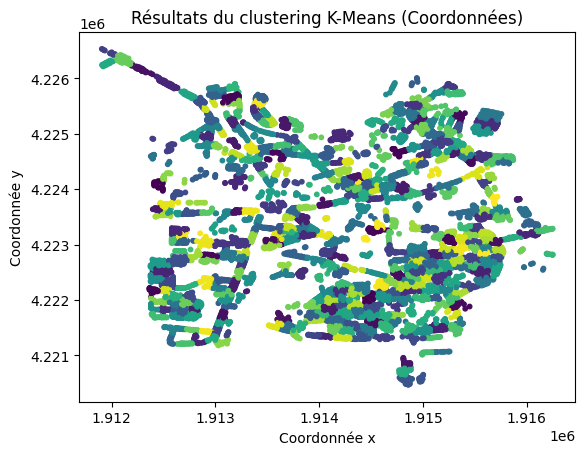

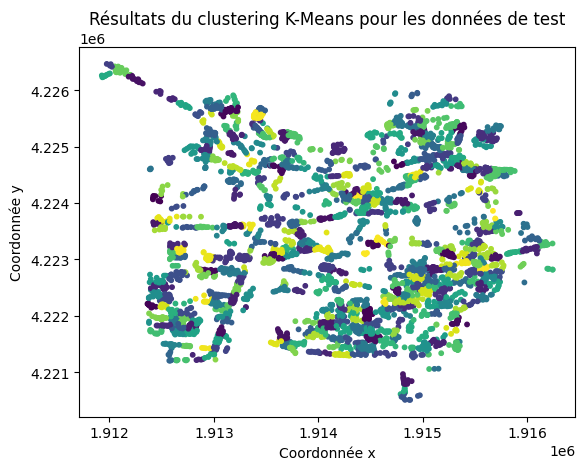

In [1319]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import joblib

# Chargement des données de coordonnées
coordonnees = df[['coord_x', 'coord_y']].values
coordonnees_test = test[['coord_x', 'coord_y']].values

# Appliquer K-Means avec 400 clusters sur les coordonnées de 'df'
kmeans = KMeans(n_clusters=400, random_state=42)
kmeans.fit(coordonnees)

# Récupérer les labels des clusters pour le jeu d'entraînement
df['cluster'] = kmeans.labels_

# Calculer l'indice de silhouette pour évaluer la qualité du clustering
score = silhouette_score(coordonnees, kmeans.labels_)
print(f'Indice de silhouette pour 400 clusters : {score}')

# Visualisation des clusters sur les données d'entraînement
plt.scatter(df['coord_x'], df['coord_y'], c=df['cluster'], cmap='viridis', s=10)
plt.title('Résultats du clustering K-Means (Coordonnées)')
plt.xlabel('Coordonnée x')
plt.ylabel('Coordonnée y')
plt.show()

# Maintenant, appliquer le même modèle KMeans aux données de test

# Prédire les clusters pour les données de test
test['cluster'] = kmeans.predict(coordonnees_test)

# Visualisation des clusters pour les données de test (optionnel)
plt.scatter(test['coord_x'], test['coord_y'], c=test['cluster'], cmap='viridis', s=10)
plt.title('Résultats du clustering K-Means pour les données de test')
plt.xlabel('Coordonnée x')
plt.ylabel('Coordonnée y')
plt.show()

# Supprimer les colonnes 'coord_x' et 'coord_y' des deux DataFrames puisque les clusters les remplacent
df = df.drop(columns=['coord_x', 'coord_y'])
test = test.drop(columns=['coord_x', 'coord_y'])

# Réorganiser les colonnes en déplaçant 'cluster' à l'emplacement initial des coordonnées (ici index 27)
col_index_df = df.columns.get_loc('cluster')
cols_df = df.columns.tolist()
cluster_col_df = cols_df.pop(col_index_df)  # Retirer la colonne 'cluster'
cols_df.insert(27, cluster_col_df)  # Insérer 'cluster' à l'emplacement souhaité

# Réorganiser le DataFrame d'entraînement
df = df[cols_df]

# Faire la même chose pour les données de test
col_index_test = test.columns.get_loc('cluster')
cols_test = test.columns.tolist()
cluster_col_test = cols_test.pop(col_index_test)
cols_test.insert(27, cluster_col_test)

# Réorganiser le DataFrame de test
test = test[cols_test]

# Enregistrer le modèle KMeans pour les coordonnées
joblib.dump(kmeans, '../cluster/kmeans_model_coordonnées.pkl')

# Sauvegarder les DataFrames mis à jour si nécessaire
df.to_csv(r'../data/df_with_clusters.csv', index=False)
test.to_csv(r'../data/test_with_clusters.csv', index=False)


On normalise tout :

In [1320]:
# Import des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler



# Sélection des colonnes numériques à standardiser
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Création de l'objet StandardScaler
scaler = StandardScaler()

# Standardisation des données
df_scaled = df.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Affichage des données standardisées
print("Données après Standardisation (Z-Score) :\n", df_scaled)
bool_columns = df_scaled.select_dtypes(include=['bool']).columns  # Sélectionne les colonnes booléennes
df[bool_columns] = df[bool_columns].astype(int)  # Convertit en int


[0 1]


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- INTITULEPROTECTIONPLU_L 123-1
- INTITULEPROTECTIONPLU_L 123-1.7
- SOUS_CATEGORIE_DESC_Arbre d'enceintes fermées
- SOUS_CATEGORIE_DESC_Arbre d'espaces ouverts
Feature names seen at fit time, yet now missing:
- INTITULEPROTECTIONPLU_L 1231
- INTITULEPROTECTIONPLU_L 1231.7
- SOUS_CATEGORIE_DESC_Arbre denceintes fermées
- SOUS_CATEGORIE_DESC_Arbre despaces ouverts
- TYPEIMPLANTATIONPLU_Périmètre


### Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Séparation des caractéristiques et de la cible
X = df_scaled.drop(columns=["DEFAUT"])  # Caractéristiques (features)
y = df_scaled["DEFAUT"]  # Cible (target)

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
model = RandomForestClassifier()
model.fit(X_train, y_train)




RandomForestClassifier()

In [ ]:
# Prédire les classes sur les données de test
y_pred = model.predict(X_test)

# Calcul des métriques d'évaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Affichage des résultats
print("Précision du modèle : {:.2f}%".format(accuracy * 100))
print("\nMatrice de confusion :\n", conf_matrix)
print("\nRapport de classification :\n", class_report)


Précision du modèle : 87.09%

Matrice de confusion :
 [[1936  155]
 [ 242  742]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      2091
           1       0.83      0.75      0.79       984

    accuracy                           0.87      3075
   macro avg       0.86      0.84      0.85      3075
weighted avg       0.87      0.87      0.87      3075



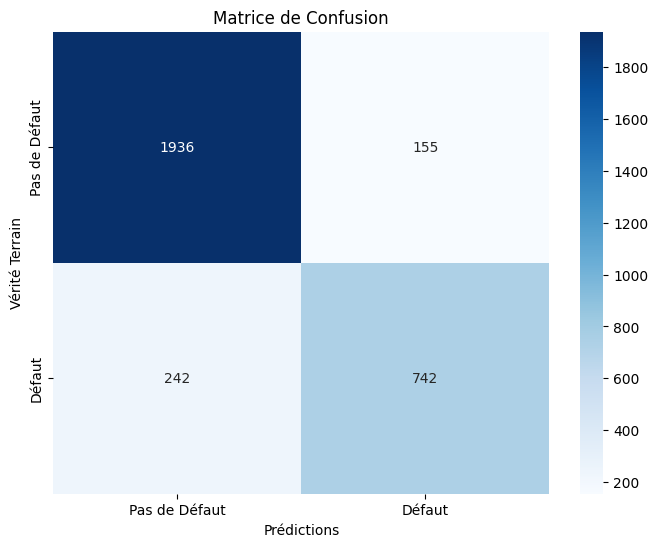

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pas de Défaut', 'Défaut'], yticklabels=['Pas de Défaut', 'Défaut'])
plt.ylabel('Vérité Terrain')
plt.xlabel('Prédictions')
plt.title('Matrice de Confusion')
plt.show()


In [ ]:
# Supposons que new_data est un DataFrame avec les mêmes caractéristiques que X_train
new_data_scaled = scaler.transform(new_data[numeric_columns])  # Ne pas inclure DEFAUT
predictions = model.predict(new_data_scaled)

# Affichage des prédictions
print("Prédictions sur les nouvelles données :", predictions)


NameError: name 'new_data' is not defined

In [ ]:
import joblib

# Sauvegarde du modèle
joblib.dump(model, 'random_forest_model.pkl')

# Chargement du modèle
loaded_model = joblib.load('random_forest_model.pkl')


In [ ]:
# Exporter le DataFrame en CSV
df_scaled.to_csv(r'../data/preprocessed_data.csv', index=False)
